In [1]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import floor

# Purpose

This notebook is meant to practice analyzing one VA station at a time.

 

# The Data

In [2]:
master = pd.read_csv("Master/Master.csv")
df = master
df.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,-0.61,-18.263473,0.85,33.864542,44.0,3076.923077,0.029907,0.033158,0.052457,0.050413
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.86,26.708075,1.07,27.295918,48.0,5714.285714,0.038846,0.055806,0.047889,0.054539
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.71,13.396226,-1.34,-119.642857,-291.0,-7929.155313,0.154349,0.093525,0.104459,0.102658
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,2.58,81.388013,-0.84,-50.602410,-46.0,-1749.049430,0.047089,0.051000,0.088287,0.092925
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-0.72,-19.726027,0.08,3.007519,-7.0,-232.558140,0.035160,0.031584,0.038942,0.042602


# Functions

In [3]:
# Marks where in a histogram the station is located. 
# Code belongs to Tony Babarino from stackoverflow.com.
# http://stackoverflow.com/questions/35890738/change-the-colour-of-a-matplotlib-histogram-bin-bar-given-a-value

def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')

# The Station



In [4]:
#Station = df[df["Station"] == "573"]#Gainesville
#Station = df[df["Station"] == "358"]
#Station = df[df["Station"] == "504"]
#Station = df[df["Station"] == "664"]# San Diego
#Station = df[df["Station"] == "663"]# Seattle, WA
Station = df[df["Station"] == "668"]# Spokane, WA
#Station = df[df["Station"] == "687"]# Walla Walla, WA



station_number = Station["Station"].to_string(index=False)
#Station[["Appts_Pending_1412","Appts_Pending_1610"]]
print Station["Location"]

119    (V20) (668) Spokane, WA
Name: Location, dtype: object


### Marking the station

In [5]:
mark = []
for index, row in df.iterrows():
    if row["Station"] == Station["Station"].to_string(index=False):
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark
    

### Metric

In [6]:
def std_distance(factor):
    std = df[factor].std()
    mean = df[factor].mean()
    return "{}: {}".format(factor,str((Station[factor].item()-mean)/std))
def std_distance_raw(factor):
    std = df[factor].std()
    mean = df[factor].mean()
    return (mean - Station[factor].item())/std

In [7]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13",
          "Physician_Turnover_FY14","Physician_Turnover_FY15",'Staff_11_To_12_Increase_%','Staff_12_To_13_Increase_%',
          'Staff_13_To_14_Increase_%','Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%"]





def interest_metric(station):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (station[factor].item() - mean)/std
        interest[factor] = distance
    return interest

interest_metric(Station)

{'Choice_Increase_%': 1.7420378649296497,
 'Complete_Increase_%': 0.1981919103969127,
 'Complete_Pending_Gap_Increase_%': -0.10819083800011774,
 'MH_Wait_Pending_Increase_%': -0.48026392684402469,
 'PC_Wait_Complete_Increase_%': 0.14385902653678323,
 'PC_Wait_Pending_Increase_%': 0.85641628192293928,
 'Pending_Increase_%': -0.99741791126585411,
 'Physician_Turnover_FY11': 0.43089004628450978,
 'Physician_Turnover_FY12': 2.4671140451493883,
 'Physician_Turnover_FY13': 0.10476239900883874,
 'Physician_Turnover_FY14': 0.79668734621198045,
 'Physician_Turnover_FY15': 0.83615641647141292,
 'SC_Wait_Complete_Increase_%': 0.12505623164402571,
 'SC_Wait_Pending_Increase_%': 0.32625238096119102,
 'Staff_11_To_12_Increase_%': 0.15542983837780427,
 'Staff_12_To_13_Increase_%': -0.50820261316187287,
 'Staff_13_To_14_Increase_%': 0.76367615144275269,
 'Staff_14_To_15_Increase_%': 0.47570991162358373,
 'Staff_15_To_16_Increase_%': 1.4723420888028034}

count    19.000000
mean      0.463185
std       0.816089
min      -0.997418
25%       0.114909
50%       0.326252
75%       0.816422
max       2.467114
Name: Station, dtype: float64

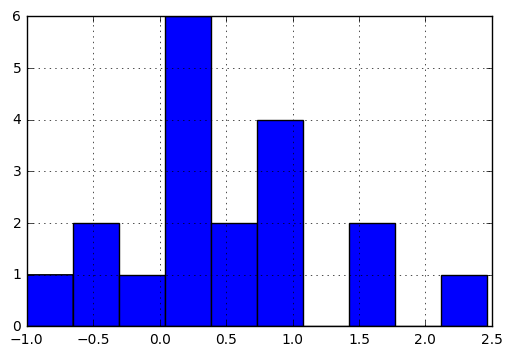

In [8]:
x = interest_metric(Station)
pd.DataFrame(x,index=["Station"]).transpose()["Station"].hist()
pd.DataFrame(x,index=["Station"]).transpose()["Station"].describe()


### Pending percent increase

In [9]:

print "================\nWait Times\n"
print std_distance('PC_Wait_Pending_Increase_%')
print std_distance('PC_Wait_Complete_Increase_%')
print std_distance('SC_Wait_Pending_Increase_%')
print std_distance('SC_Wait_Complete_Increase_%')
print std_distance('MH_Wait_Pending_Increase_%')
print std_distance('MH_Wait_Complete_Increase_%')
print "================\nAppointments\n"
print std_distance("Pending_Increase_%")
print std_distance("Complete_Increase_%")
print "================\nChoice Hires\n"
print std_distance("Choice_Increase_%")
print "================\nPhysician Turnover\n"
print std_distance("Physician_Turnover_FY11")
print std_distance("Physician_Turnover_FY12")
print std_distance("Physician_Turnover_FY13")
print std_distance("Physician_Turnover_FY14")
print std_distance("Physician_Turnover_FY15")
print "================\nStaff Increase\n"
print std_distance('Staff_11_To_12_Increase_%')
print std_distance('Staff_12_To_13_Increase_%')
print std_distance('Staff_13_To_14_Increase_%')
print std_distance('Staff_14_To_15_Increase_%')
print std_distance('Staff_15_To_16_Increase_%')

Wait Times

PC_Wait_Pending_Increase_%: 0.856416281923
PC_Wait_Complete_Increase_%: 0.143859026537
SC_Wait_Pending_Increase_%: 0.326252380961
SC_Wait_Complete_Increase_%: 0.125056231644
MH_Wait_Pending_Increase_%: -0.480263926844
MH_Wait_Complete_Increase_%: -0.664184841222
Appointments

Pending_Increase_%: -0.997417911266
Complete_Increase_%: 0.198191910397
Choice Hires

Choice_Increase_%: 1.74203786493
Physician Turnover

Physician_Turnover_FY11: 0.430890046285
Physician_Turnover_FY12: 2.46711404515
Physician_Turnover_FY13: 0.104762399009
Physician_Turnover_FY14: 0.796687346212
Physician_Turnover_FY15: 0.836156416471
Staff Increase

Staff_11_To_12_Increase_%: 0.155429838378
Staff_12_To_13_Increase_%: -0.508202613162
Staff_13_To_14_Increase_%: 0.763676151443
Staff_14_To_15_Increase_%: 0.475709911624
Staff_15_To_16_Increase_%: 1.4723420888


In [10]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY14",
           "Physician_Turnover_FY15",'Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%']





def interest_metric(station):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (Station[factor].item() - mean)/std
        interest[factor] = distance
    return interest

interest_metric(Station)

{'Choice_Increase_%': 1.7420378649296497,
 'Complete_Increase_%': 0.1981919103969127,
 'MH_Wait_Pending_Increase_%': -0.48026392684402469,
 'PC_Wait_Complete_Increase_%': 0.14385902653678323,
 'PC_Wait_Pending_Increase_%': 0.85641628192293928,
 'Pending_Increase_%': -0.99741791126585411,
 'Physician_Turnover_FY14': 0.79668734621198045,
 'Physician_Turnover_FY15': 0.83615641647141292,
 'SC_Wait_Complete_Increase_%': 0.12505623164402571,
 'SC_Wait_Pending_Increase_%': 0.32625238096119102,
 'Staff_14_To_15_Increase_%': 0.47570991162358373,
 'Staff_15_To_16_Increase_%': 1.4723420888028034}

In [11]:
interest = interest_metric(Station)
angle = 0
for factor in interest:
    if abs(interest[factor]) >= 1:
        angle += 1
        print "{}: {}".format(factor,interest[factor])
        
angle

Staff_15_To_16_Increase_%: 1.4723420888
Choice_Increase_%: 1.74203786493


2

# Looking at the Angles

In [12]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY14",
           "Physician_Turnover_FY15",'Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%",
          "PC_Wait_Complete_1409","PC_Wait_Complete_1608","PC_Wait_Pending_1412","PC_Wait_Pending_1610"]

In [13]:
def interest_metric(x):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (x[factor] - mean)/std
        interest[factor] = distance
    return interest



angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        #print interest_dict[factor]
        if abs(interest_dict[factor]) >= 1:
            angle += 1
    angles.append(angle)
df["angles"] = angles
df["angles"].value_counts()

0    38
1    35
2    27
3    21
4    10
5     7
6     3
8     1
Name: angles, dtype: int64

In [14]:
strongest_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) > angle:
            angle = floor(abs(interest_dict[factor]))
    strongest_angles.append(angle)
df["strongest_angles"] = strongest_angles
df["strongest_angles"].value_counts()

1.0     64
0.0     38
2.0     21
3.0      6
4.0      5
5.0      3
8.0      2
6.0      2
11.0     1
Name: strongest_angles, dtype: int64

In [15]:
strong_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) >= 2:
            angle += 1
    strong_angles.append(angle)
df["strong_angles"] = strong_angles
df["strong_angles"].value_counts()

0    102
1     24
2     13
5      1
4      1
3      1
Name: strong_angles, dtype: int64

In [16]:
for factor in factors:
    print factor

PC_Wait_Pending_Increase_%
PC_Wait_Complete_Increase_%
SC_Wait_Pending_Increase_%
SC_Wait_Complete_Increase_%
MH_Wait_Pending_Increase_%
MH_Wait_Pending_Increase_%
Pending_Increase_%
Complete_Increase_%
Choice_Increase_%
Physician_Turnover_FY14
Physician_Turnover_FY15
Staff_14_To_15_Increase_%
Staff_15_To_16_Increase_%
Complete_Pending_Gap_Increase_%
PC_Wait_Complete_1409
PC_Wait_Complete_1608
PC_Wait_Pending_1412
PC_Wait_Pending_1610


In [17]:
strongest_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) > angle:
            angle = floor(abs(interest_dict[factor]))
    strongest_angles.append(angle)
df["strongest_angles"] = strongest_angles
df["strongest_angles"].value_counts()

1.0     64
0.0     38
2.0     21
3.0      6
4.0      5
5.0      3
8.0      2
6.0      2
11.0     1
Name: strongest_angles, dtype: int64

In [18]:
df

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16,Mark,angles,strongest_angles,strong_angles
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,44.0,3076.923077,0.029907,0.033158,0.052457,0.050413,no,2,1.0,0
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,48.0,5714.285714,0.038846,0.055806,0.047889,0.054539,no,3,2.0,1
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,-291.0,-7929.155313,0.154349,0.093525,0.104459,0.102658,no,3,1.0,0
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,-46.0,-1749.049430,0.047089,0.051000,0.088287,0.092925,no,3,5.0,2
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-7.0,-232.558140,0.035160,0.031584,0.038942,0.042602,no,1,1.0,0
5,22602,9.26%,10.54,12.50,4.18,631va,(V01) (631) MC NORTHAMPTON MA,639.0,726.0,767.0,...,109.0,3745.704467,0.035174,0.031056,0.040694,0.044875,no,1,1.0,0
6,38893,4.12%,7.40,4.59,9.33,650pr,(V01) (650) MC PROVIDENCE RI,1215.0,1262.0,1279.0,...,-147.0,-3629.629630,0.034505,0.026504,0.047053,0.046103,no,1,1.0,0
7,49615,2.18%,2.35,4.15,3.92,689va,(V01) (689) HCS WEST HAVEN CT,2477.0,2541.0,2623.0,...,-129.0,-4314.381271,0.056676,0.053834,0.057834,0.057293,no,1,1.0,0
8,31376,3.16%,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,179.0,5927.152318,0.001530,0.001209,0.001930,0.002135,no,6,8.0,2
9,14816,4.20%,3.35,7.70,4.97,528ba,NaN,NaN,NaN,NaN,...,200.0,153846.153846,NaN,NaN,NaN,NaN,no,0,0.0,0


# Extracting Interesting Columns

In [19]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13",
          "Physician_Turnover_FY14","Physician_Turnover_FY15",'Staff_11_To_12_Increase_%','Staff_12_To_13_Increase_%',
          'Staff_13_To_14_Increase_%','Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%",
          "PC_Wait_Complete_1409","PC_Wait_Complete_1608","PC_Wait_Pending_1412","PC_Wait_Pending_1610",
          "Choice_Increase_%_PC_Wait_Pending_1412_Ratio","Choice_Increase_%_PC_Wait_Complete_1409_Ratio",
          "MH_Wait_Complete_1409","MH_Wait_Complete_1608","MH_Wait_Pending_1412","MH_Wait_Pending_1610",
          "SC_Wait_Complete_1409","SC_Wait_Complete_1608","SC_Wait_Pending_1412","SC_Wait_Pending_1610",
          "Complete_Pending_Gap_Increase_%"]

def interest_metric(x):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (x[factor] - mean)/std
        interest[factor] = distance
    return interest


#Station = df[df["Station"] == "573"]#Gainesville
#Station = df[df["Station"] == "358"]
#Station = df[df["Station"] == "504"]
Station = df[df["Station"] == "664"]# San Diego
#Station = df[df["Station"] == "663"]# Seattle, WA
#Station = df[df["Station"] == "668"]# Spokane, WA
#Station = df[df["Station"] == "687"]# Walla Walla, WA
#Station = df[df["Station"] == "605"]# Loma Linda, CA
#Station = df[df["ID"] == "691gr"]# LA, CA




# see how many standard deviations each factor is from the mean
station_std = interest_metric(Station)
standard_columns = ["Station","Location"]
extra_columns = ["MH_Wait_Pending_Increase_%","MH_Wait_Complete_Increase_%"]
interesting_angles = []
for key in station_std:
    if station_std[key].item() >= 1:
        interesting_angles.append(key)
    if station_std[key].item() >= 2:
        print "Big angle! {}".format(key)
Station[standard_columns+interesting_angles+extra_columns]  


Big angle! Complete_Pending_Gap_Increase_%


,Station,Location,MH_Wait_Pending_1610,MH_Wait_Complete_1608,Complete_Pending_Gap_Increase_%,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase_%
132,664,"(V22) (664) San Diego, CA",8.26,5.38,35.881356,20.989505,7933.333333


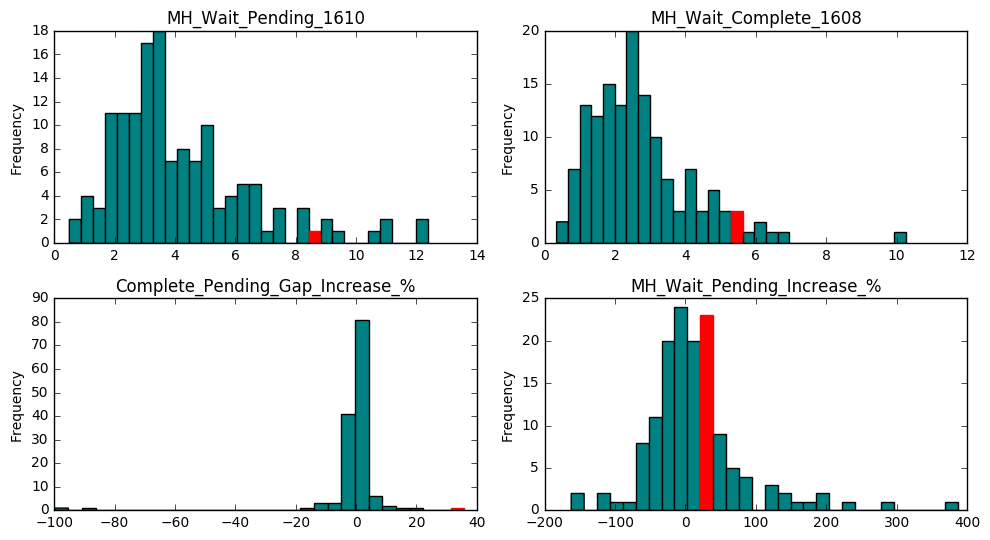

In [20]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,16))
axes_list = [item for sublist in axes for item in sublist] 

interesting_angles.append("MH_Wait_Pending_Increase_%")
for factor in interesting_angles:
    ax = axes_list.pop(0)
    ax.set_title(factor)
    marked_hist(factor,ax)


# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

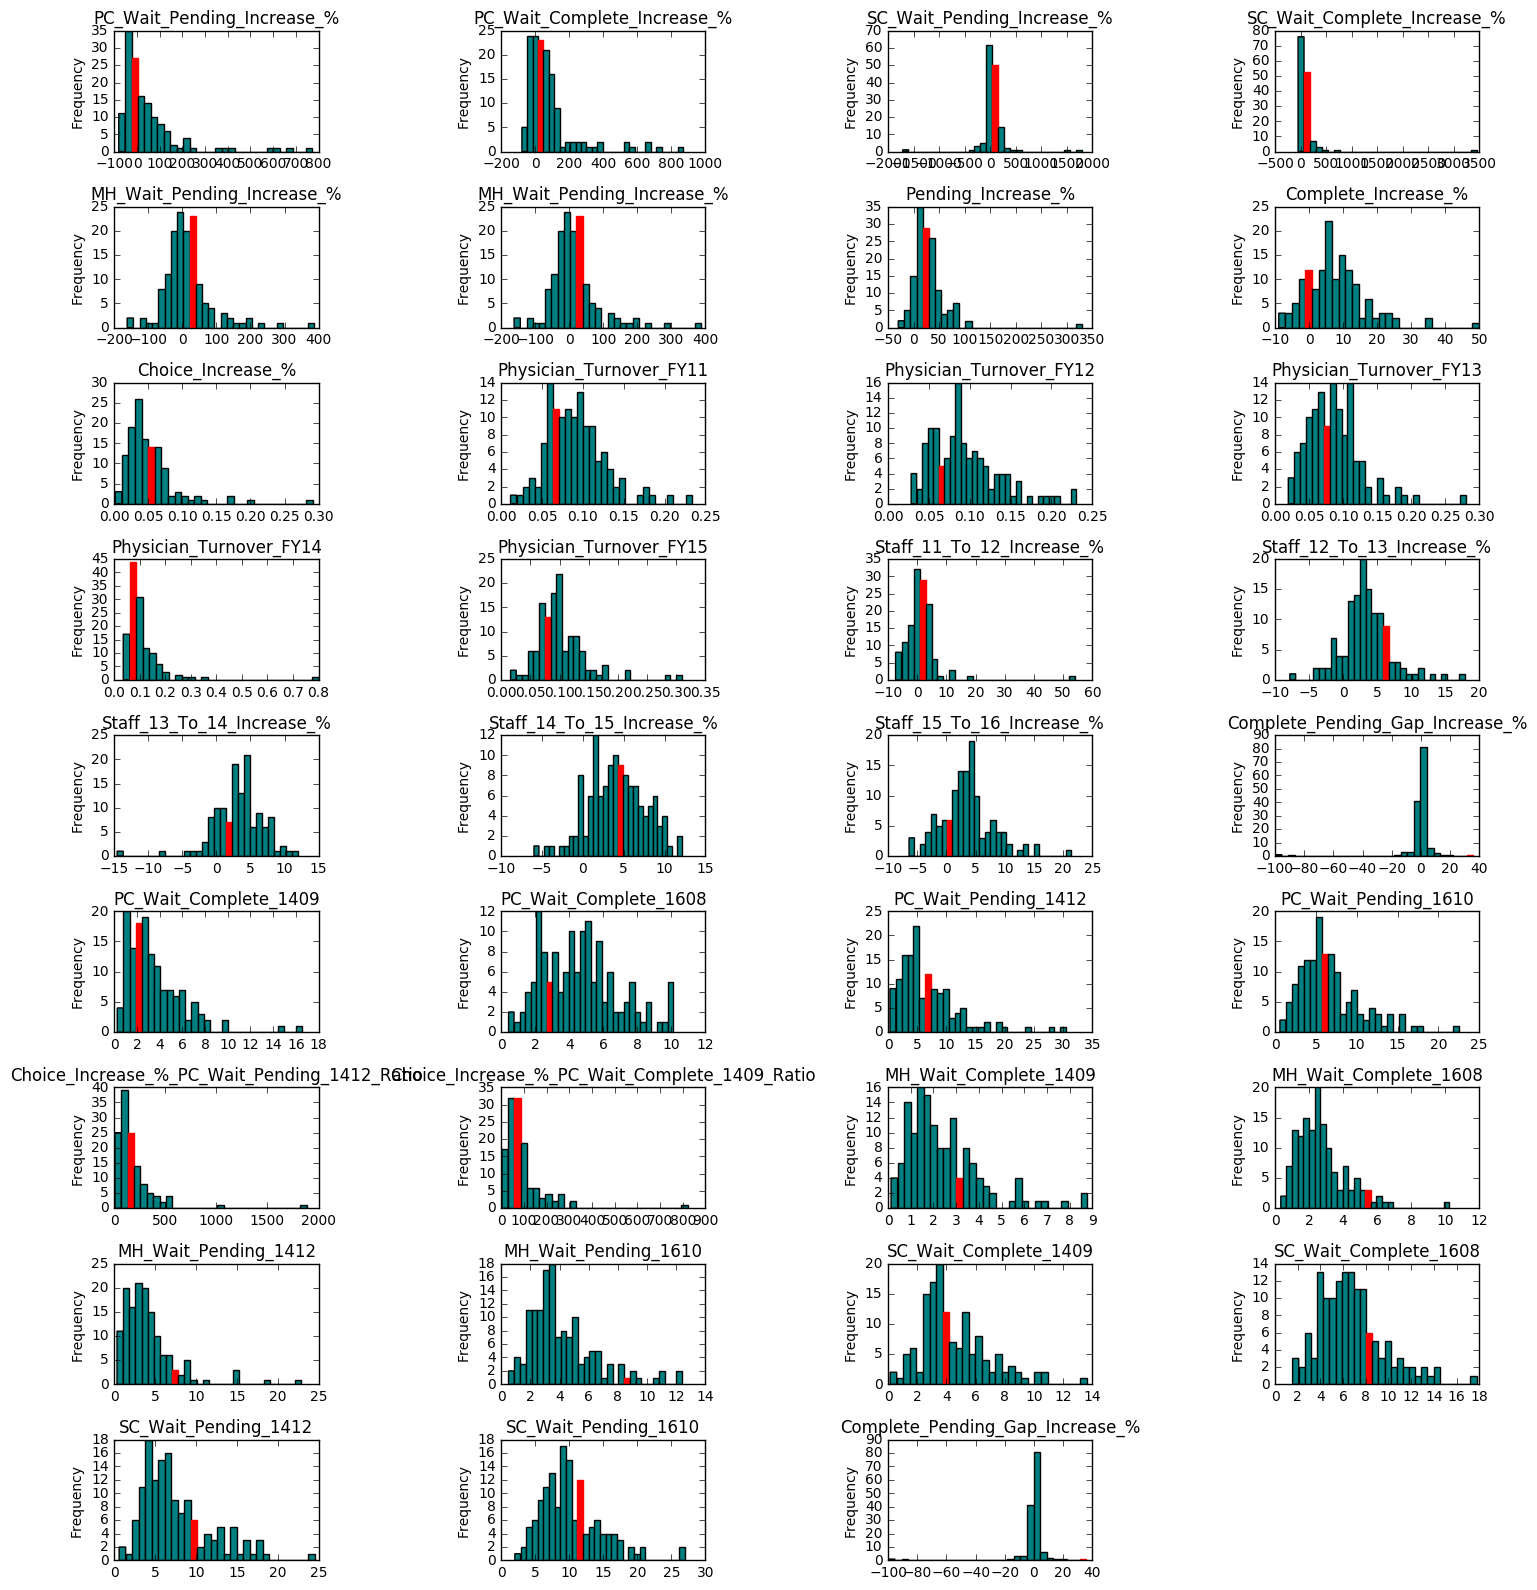

In [21]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(15,16))
axes_list = [item for sublist in axes for item in sublist] 

for factor in factors:
    ax = axes_list.pop(0)
    ax.set_title(factor)
    marked_hist(factor,ax)


# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

In [22]:

print "================\nWait Times\n"
print std_distance('PC_Wait_Pending_Increase_%')
print std_distance('PC_Wait_Complete_Increase_%')
print std_distance('SC_Wait_Pending_Increase_%')
print std_distance('SC_Wait_Complete_Increase_%')
print std_distance('MH_Wait_Pending_Increase_%')
print std_distance('MH_Wait_Complete_Increase_%')
print "================\nAppointments\n"
print std_distance("Pending_Increase_%")
print std_distance("Complete_Increase_%")
print std_distance("Complete_Pending_Gap_Increase_%")

print "================\nChoice Hires\n"
print std_distance("Choice_Increase_%")
print std_distance("Choice_Increase_%_PC_Wait_Complete_1409_Ratio")
print "================\nPhysician Turnover\n"
print std_distance("Physician_Turnover_FY11")
print std_distance("Physician_Turnover_FY12")
print std_distance("Physician_Turnover_FY13")
print std_distance("Physician_Turnover_FY14")
print std_distance("Physician_Turnover_FY15")
print "================\nStaff Increase\n"
print std_distance('Staff_11_To_12_Increase_%')
print std_distance('Staff_12_To_13_Increase_%')
print std_distance('Staff_13_To_14_Increase_%')
print std_distance('Staff_14_To_15_Increase_%')
print std_distance('Staff_15_To_16_Increase_%')

Wait Times

PC_Wait_Pending_Increase_%: -0.467705499954
PC_Wait_Complete_Increase_%: -0.371373511347
SC_Wait_Pending_Increase_%: -0.148020659265
SC_Wait_Complete_Increase_%: 0.0389840024317
MH_Wait_Pending_Increase_%: 0.0971021011774
MH_Wait_Complete_Increase_%: 0.116178294933
Appointments

Pending_Increase_%: -0.458680199435
Complete_Increase_%: -0.939468205084
Complete_Pending_Gap_Increase_%: 3.00297866667
Choice Hires

Choice_Increase_%: -0.110329147977
Choice_Increase_%_PC_Wait_Complete_1409_Ratio: -0.522196934138
Physician Turnover

Physician_Turnover_FY11: -0.750659946302
Physician_Turnover_FY12: -0.696793791831
Physician_Turnover_FY13: -0.354799782339
Physician_Turnover_FY14: -0.547284021657
Physician_Turnover_FY15: -0.675530485727
Staff Increase

Staff_11_To_12_Increase_%: 0.0533275949598
Staff_12_To_13_Increase_%: 0.707083407833
Staff_13_To_14_Increase_%: -0.554849871313
Staff_14_To_15_Increase_%: 0.00537376325586
Staff_15_To_16_Increase_%: -0.669668577628


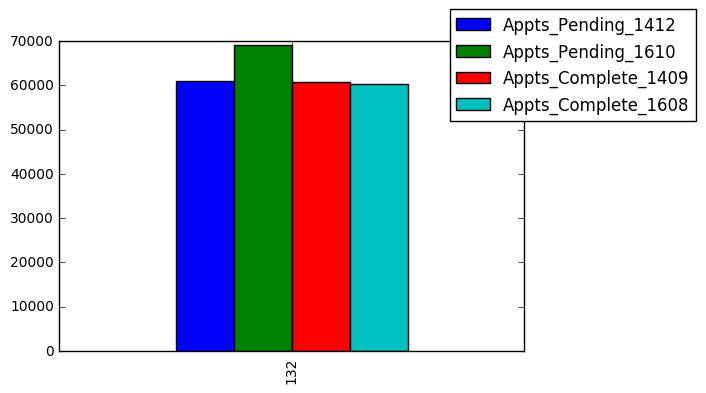

In [23]:
ax = Station[["Appts_Pending_1412","Appts_Pending_1610","Appts_Complete_1409","Appts_Complete_1608"]].plot(kind="bar",)
plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [24]:
for column in df.columns:
    print column

Appts_Pending_1412
%_Appts_Over_30_Pending_1412
PC_Wait_Pending_1412
SC_Wait_Pending_1412
MH_Wait_Pending_1412
ID
ORGANIZATION
MAY-FY11
MAY-FY12
MAY-FY13
MAY-FY14
MAY-FY15
MAY-FY16
Appts_Pending_1610
%_Appts_Over_30_Pending_1610
PC_Wait_Pending_1610
SC_Wait_Pending_1610
MH_Wait_Pending_1610
Appts_Complete_1608
%_Appts_Over_30_Complete_1608
PC_Wait_Complete_1608
SC_Wait_Complete_1608
MH_Wait_Complete_1608
Station
Location
for_dups
Choice_Hires
Interim
Vacancy
%_Appts_Over_30_Complete_1409
Appts_Complete_1409
MH_Wait_Complete_1409
PC_Wait_Complete_1409
SC_Wait_Complete_1409
Physician_Turnover_FY11
Physician_Turnover_FY12
Physician_Turnover_FY13
Physician_Turnover_FY14
Physician_Turnover_FY15
NbrPsychiatrists
Pending_Increase
Pending_Increase_%
Complete_Increase
Complete_Increase_%
Complete_Pending_Appts_Diff_14
Complete_Pending_Appts_Diff_16
Complete_Pending_Appts_Diff_14_%
Complete_Pending_Appts_Diff_16_%
Complete_Pending_Gap_Increase_%
Missing_Leadership
Staff_11_To_12_Increase
Staff_1

In [25]:
for factor in factors:
    print factor

PC_Wait_Pending_Increase_%
PC_Wait_Complete_Increase_%
SC_Wait_Pending_Increase_%
SC_Wait_Complete_Increase_%
MH_Wait_Pending_Increase_%
MH_Wait_Pending_Increase_%
Pending_Increase_%
Complete_Increase_%
Choice_Increase_%
Physician_Turnover_FY11
Physician_Turnover_FY12
Physician_Turnover_FY13
Physician_Turnover_FY14
Physician_Turnover_FY15
Staff_11_To_12_Increase_%
Staff_12_To_13_Increase_%
Staff_13_To_14_Increase_%
Staff_14_To_15_Increase_%
Staff_15_To_16_Increase_%
Complete_Pending_Gap_Increase_%
PC_Wait_Complete_1409
PC_Wait_Complete_1608
PC_Wait_Pending_1412
PC_Wait_Pending_1610
Choice_Increase_%_PC_Wait_Pending_1412_Ratio
Choice_Increase_%_PC_Wait_Complete_1409_Ratio
MH_Wait_Complete_1409
MH_Wait_Complete_1608
MH_Wait_Pending_1412
MH_Wait_Pending_1610
SC_Wait_Complete_1409
SC_Wait_Complete_1608
SC_Wait_Pending_1412
SC_Wait_Pending_1610
Complete_Pending_Gap_Increase_%
